In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import networkx as nx
import scipy as sp
import re

%matplotlib notebook

**Public Bucket for csv https://storage.googleapis.com/datascibucket/cs505/oct_committers.csv**

In [2]:
df = pd.read_csv('oct_committers.csv')

In [3]:
df = df.dropna()
df.head(100)

,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [4]:
# only gets rows where there is a valid email for the user
df_valid_emails = df[df.committer_email.str.contains(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", regex=True)]
df_valid_emails.head(100)

/Users/freddiev4/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,committer_name,committer_email,committer_date,repo_name,total_num_commits
0,Tim Gardner,c65a040f7f664378353fb65fc3553df208a14f68@canon...,2016-10-03 01:19:38 UTC,endlessm/linux,454
1,Arno Candel,329f27436ec86be242c31f07766a746ac09e1189@gmail...,2016-10-14 22:42:01 UTC,h2oai/h2o-3,274
2,Vishal Moorthy,6e7e1cdd421bd9e00a7327c63e6b6dc428aeec90@gmail...,2016-10-23 15:17:36 UTC,Veeshal/openmrs-core,199
3,Omar Sahyoun,a96b2b56dc28a05e55acddfc13ca13060f61ada2@gmail...,2016-10-18 16:28:21 UTC,SumOfUs/Champaign,194
4,Michael James Gratton,a17fed27eaa842282862ff7c1b9c8395a26ac320@vee.net,2016-10-03 23:58:17 UTC,GNOME/geary,177
5,Mihail Muhin,8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbr...,2016-10-02 15:05:48 UTC,mihmuh/IntelliJConsole,149
6,Nicolas Matthew Vinson Wauquiez,18f132293a70890e40b1f942be35644307cd0085@gmail...,2016-10-26 03:15:13 UTC,NMVW/pluribus,147
7,calebmer,024ddedc1e44b2a2266115975956c072dec65389@gmail...,2016-10-09 22:59:36 UTC,calebmer/postgraphql,141
8,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,spinnaker/spinnaker,139
9,Eric Wiseblatt,201e3ca0515b4c2f115190fe4475ccc439f1f1a4@googl...,2016-10-06 15:26:12 UTC,skim1420/spinnaker,139


In [5]:
# Group by repo_name so the results are rows with repo_names with counts for contributions
unique_emailandrepo_df = df_valid_emails.groupby(['committer_email', 'committer_name', 'repo_name'], as_index=False).aggregate(np.sum).sort_values('total_num_commits', ascending=False)
unique_emailandrepo_df.reset_index()

,index,committer_email,committer_name,repo_name,total_num_commits
0,57788,1a73af9e7ae00182733b2292511b814be66f065f@pyjob...,pyjobs,pyjobs/annonces,13433
1,128190,7555aa909aeefc4b48a22650b82530052cae90a6@gmail...,nathanbl,nathanbl/date-info,4088
2,222469,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,RootWizard/MagiKernel,3992
3,3963,0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,Pearyman,Pearyman/webexamples,3809
4,76832,333a0a56843ecfbd7d1f247ae3587f84236536bc@hotma...,miatribepi,miatribe/pipvpspy,3667
5,7114,0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail...,Ryan Niehaus,ryanniehaus/open_source_package_builder,3479
6,222468,f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail...,Nathan Chancellor,Miccia94/kernel_moto_shamu,2935
7,107190,5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail...,REV3NT3CH,B14CKB1RD-Kernel/B14CKB1RD_Kernel_N6,2909
8,77134,33bdcd680497cab5d61957b985513fceb724a953@gmail...,marcomow,marcomow/keklv,2289
9,132264,7a89f8c141f243fdebb219cb07878db4e9efb474@gmail...,pbaffiliate1,pbaffiliate1/testRepository,1903


In [6]:
# Create adjacency matrix df with users as rows and repos as columns (with empty values = 0)

first_thousand_df = unique_emailandrepo_df.head(2000)

#unique repos:
unique_repo_names = first_thousand_df.repo_name.unique()
#unique user:
unique_users = first_thousand_df.committer_email.unique()

print('Num unique repos: {}'.format(len(unique_repo_names)))
print('Num unique users: {}'.format(len(unique_users)))

#create adj matrix df
adj_matrix_df = pd.DataFrame(columns=unique_repo_names, index=unique_users).fillna(0)
print(adj_matrix_df.shape)
square_adj_matrix_df = pd.concat([adj_matrix_df, adj_matrix_df.T]).fillna(0)
square_adj_matrix_df.shape

Num unique repos: 1293
Num unique users: 468
(468, 1293)


(1761, 1761)

In [7]:
for index, row in first_thousand_df.iterrows():
    square_adj_matrix_df.loc[row['repo_name'],row['committer_email']] = 1
    square_adj_matrix_df.loc[row['committer_email'],row['repo_name']] = 1

square_adj_matrix_df

,024ddedc1e44b2a2266115975956c072dec65389@gmail.com,02cc9a53b6755013d45c5a340cc4cc210ac3d7d4@jetbrains.com,02e0a999c50b1f88df7a8f5a04e1b76b35ea6a88@andrewgarner.com,02e0a999c50b1f88df7a8f5a04e1b76b35ea6a88@tridgell.net,03179453b147bb095218d0bde40634e2f26a7ab1@gmail.com,0384aaef27f06874adbdb09a807bb339f4aff9fd@oracle.com,03e43da4599419c82a1dc072053b7d668c116a44@gmail.com,047f29c1907ccdb27c452e698b78ee06df6c34af@bmw-carit.de,049ee2061f71220e5aaf33f5be422fc2a2b06a44@gnome.org,04e087c2d1584f31a9cb14cf91055bf2ac600f2b@gmail.com,...,zemian/zemian.github.io,zen-kernel/zen-kernel,zendframework/zend-code,zephyrproject-rtos/zephyr,zhiyisun/linux,zhouhaibing089/kubernetes,zhouyan/MCKL,zpl1025/TranslateProject,zstackorg/zstack,zulip/zulip
1a73af9e7ae00182733b2292511b814be66f065f@pyjobs.fr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7555aa909aeefc4b48a22650b82530052cae90a6@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f65d3f2dc139dcfe7b6f0b0a466af3bc5fed8fa7@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0554fcc8949639c36b54e10d0ec815032383f759@sina.cn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333a0a56843ecfbd7d1f247ae3587f84236536bc@hotmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0968282e15ed9e224ab3a4b5d1973c8f7097dcea@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5bb7cf2571ba39bcffbb6c25fc088ed51ff9ed06@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33bdcd680497cab5d61957b985513fceb724a953@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7a89f8c141f243fdebb219cb07878db4e9efb474@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f82c7feeda2a70c25ae8184a265fb7086daee1e4@gmail.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create graph

G = nx.from_numpy_matrix(square_adj_matrix_df.as_matrix())
G = nx.relabel_nodes(G, dict(enumerate(square_adj_matrix_df.columns))) #Somehow switch out the repos with their language names
G.name = 'Graph of Users and Repositories'
print (len(G.nodes()))

#Remove nodes that are emails?

1761


In [9]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
dmax=max(degree_sequence)
print (dmax)

276


In [10]:
#Create graph with only the repo nodes (mode one bipartite graph)
G_onlyrepos = G.copy()
G_onlyrepos.name = 'Graph of Repositories'

nodes_to_remove = []
for node,degree in G_onlyrepos.degree().items():
    #print(node)
    if (node in unique_users):
        nodes_to_remove.append(node)
        print('removing: {}'.format(node))
    #print (node, degree)
    
G_onlyrepos.remove_nodes_from(nodes_to_remove)
for node,degree in G_onlyrepos.degree().items():
    print(node)

removing: 8ae75315e10eaef2abb8a518e742a2cdf5fccbe1@jetbrains.com
removing: 02e0a999c50b1f88df7a8f5a04e1b76b35ea6a88@andrewgarner.com
removing: c439d9202c657868363792e14b8bcb31397dfdaa@gmail.com
removing: a5d7a15f298f2be64041d8eaf8b4deb74e9d93ba@idyll.org
removing: 35bfff75a97c98dfccf9f835d7bbf4ab7904e719@samba.org
removing: 1ce39a140b90b59d2e7e805c49fa30f987b06457@gmail.com
removing: 03179453b147bb095218d0bde40634e2f26a7ab1@gmail.com
removing: c95050fe05ab60db34ae1c1a3a98bd98de098019@gmail.com
removing: 5cb699227be62d301a8938d918ca915ca6724ab0@gmail.com
removing: c174967555abff374c82b3af1a620cd802645104@bell.net
removing: bbe4a5f428126462a7b14036ca862f71a09646c6@live.fr
removing: f0bd52b8d7e3243b3d2dbbf8e6a364ce7572a94a@gmail.com
removing: 329f27436ec86be242c31f07766a746ac09e1189@gmail.com
removing: 201e3ca0515b4c2f115190fe4475ccc439f1f1a4@google.com
removing: b3ae1a63720f6db7c51a045c928ba7795e7cd19e@sitegeist.de
removing: 0b5013a1c70e37d24b6e2363540ced83a0ea9e98@icloud.com
removing: 0

In [11]:
#Create graph with only the repo nodes (mode one bipartite graph)
G_onlyusers = G.copy()
G_onlyusers.name = 'Graph of Users'

nodes_to_remove = []
for node,degree in G_onlyusers.degree().items():
    #print(node)
    if (node in unique_repo_names):
        nodes_to_remove.append(node)
        print('removing: {}'.format(node))
    #print (node, degree)
    
G_onlyusers.remove_nodes_from(nodes_to_remove)
for node,degree in G_onlyusers.degree().items():
    print(node)

removing: kageiit/buck
removing: rlorenzo/moodle
removing: ReemAlattas/gh
removing: freefal/lila
removing: madmax983/aura
removing: kbaseapps/ReferenceDataManager
removing: bkoelman/roslyn
removing: johnhaddon/gaffer
removing: NachiketNamjoshi/BlackReactor_onyx
removing: mbebenita/aom
removing: opencog/atomspace
removing: spakzad/ocs
removing: zhouhaibing089/kubernetes
removing: pks-t/git
removing: stshine/servo
removing: franz1981/activemq-artemis
removing: djwong/linux
removing: sdague/home-assistant
removing: tiffting/tiffting.github.io
removing: kennedyshead/home-assistant
removing: tim-janik/rapicorn
removing: abrarshivani/kubernetes
removing: puppybane/linux-cyrus
removing: atodorov/pykickstart
removing: datacarpentry/datacarpentry.github.io
removing: BostonGlobe/elections-2016
removing: ibm-contribs/kubernetes
removing: glennw/servo
removing: zstackorg/zstack
removing: dims/kubernetes
removing: dainoequinoziale/dainoequinoziale.github.io
removing: clebertsuconic/activemq-artemis

In [12]:
def calculate_core_dec(graph):
    core_dec = nx.core_number(graph)
    #print(core, "\n")
    print("Graph: {}, Max Core number: {}".format(graph.name, max(core_dec.values())))
    
    return core_dec

Graph: Graph of Repositories, Max Core number: 3


<IPython.core.display.Javascript object>


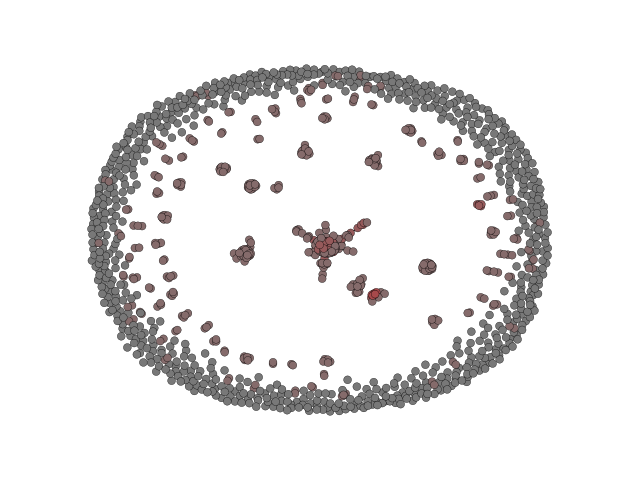

Graph: Graph of Users, Max Core number: 6


<IPython.core.display.Javascript object>


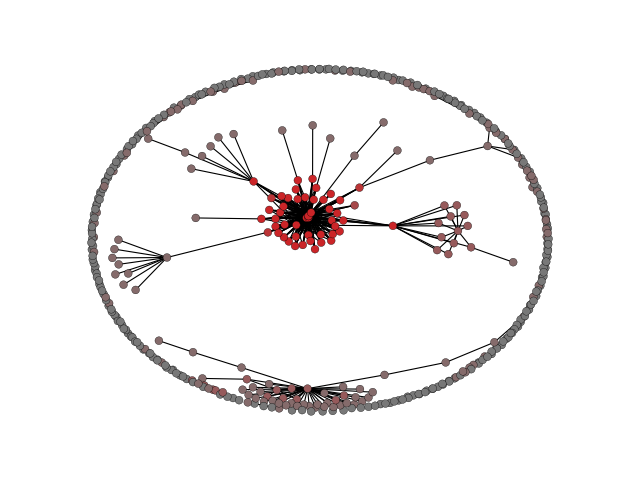

In [13]:
#Plot the networks with networkx

colors = ['#787878', '#856b6b', '#965a5b', '#a7494b', '#bb3537', '#cb2528', '#cb2528', '#f00004']

def plot_network(graphs, layout, node_size, with_labels):

    for i, graph in enumerate(graphs):
        core_dec = calculate_core_dec(graph)
        node_colors = [ colors[core_dec[v]] for v in graph.nodes()]
        plt.figure()
        if layout == '':
            nx.draw(graph, node_color=node_colors, with_labels=with_labels, node_size=node_size)
        elif layout == 'circular_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.circular_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'random_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.random_layout(graph), with_labels=with_labels, node_size=node_size)
        elif layout == 'shell_layout':
            nx.draw(graph, node_color=node_colors, pos=nx.shell_layout(graph), with_labels=with_labels, node_size=node_size)
        else:
            nx.draw(graph, node_color=node_colors, pos=nx.spectral_layout(graph), with_labels=with_labels, node_size=node_size) 

node_size = 50
with_labels = False
plot_network([G_onlyrepos, G_onlyusers], '', node_size, with_labels)

## Degree distribution

In [14]:
degree_sequence=sorted(nx.degree(G_onlyrepos).values(),reverse=True) 
dmax=max(degree_sequence)
dmax

97

Degree max for Graph of Repositories: 97


<IPython.core.display.Javascript object>


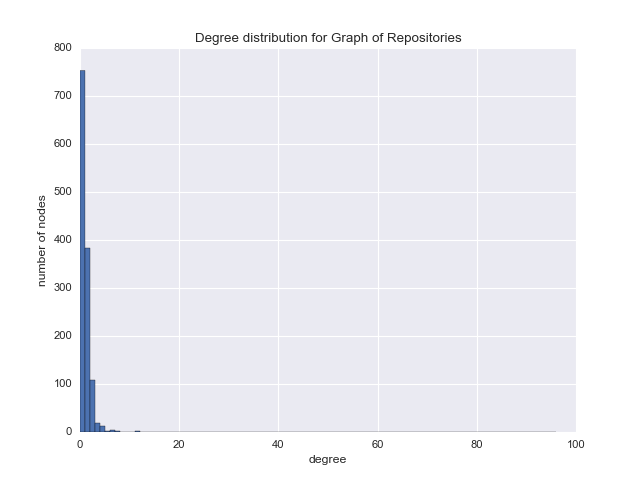

Degree max for Graph of Users: 45


<IPython.core.display.Javascript object>


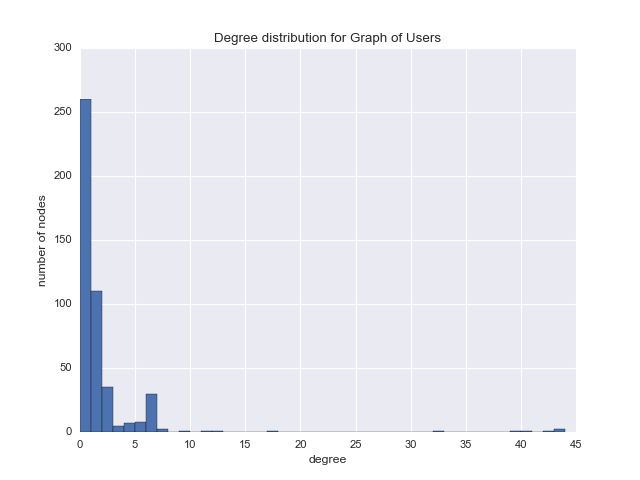

In [15]:
#Degree distributions
def plot_degree_distributions(graphs):
    for graph in graphs:
        degree_sequence=sorted(nx.degree(graph).values(),reverse=True) 
        dmax=max(degree_sequence)
        print('Degree max for {}: {}'.format(graph, dmax))
        
        plt.figure()
        h,bins,patches = plt.hist(degree_sequence,bins=range(0,dmax))
        plt.title("Degree distribution for {}".format(graph.name))
        plt.xlabel("degree")
        plt.ylabel("number of nodes")

plot_degree_distributions([G_onlyrepos, G_onlyusers])

The degree distribution looks like what you would expect from a small world network, given that there are very few with high degrees but they do exist unlike a degree distribution of a random network.

## Clustering Coefficients and Stats

In [16]:
def print_stats_of_notconnected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        #print('\tDiameter: {}'.format(nx.diameter(graph)))
        #print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
def print_stats_of_connected(graphs):
    for graph in graphs:
        print('Stats for {}:'.format(graph.name))
        print('\tDiameter: {}'.format(nx.diameter(graph)))
        print('\tAverage shortest path length: {}'.format(nx.average_shortest_path_length(graph)))
        
        ccall = nx.clustering(graph)
        ave_clustering_coefficient = nx.average_clustering(graph)
        print('\tAverage clustering coefficient: {}'.format(ave_clustering_coefficient))
        
        
def plot_clusteringcoeff_distributions(graphs):
    for graph in graphs:
        plt.figure()
        h,bins,patches = plt.hist(list(nx.clustering(graph).values()))
        plt.title("Clustering coefficient distribution for {}".format(graph.name))
        plt.ylabel("number of nodes")

Stats for Graph of Repositories:
	Average clustering coefficient: 0.0010320685545119127
Stats for Graph of Users:
	Average clustering coefficient: 0.01426231588174908


<IPython.core.display.Javascript object>


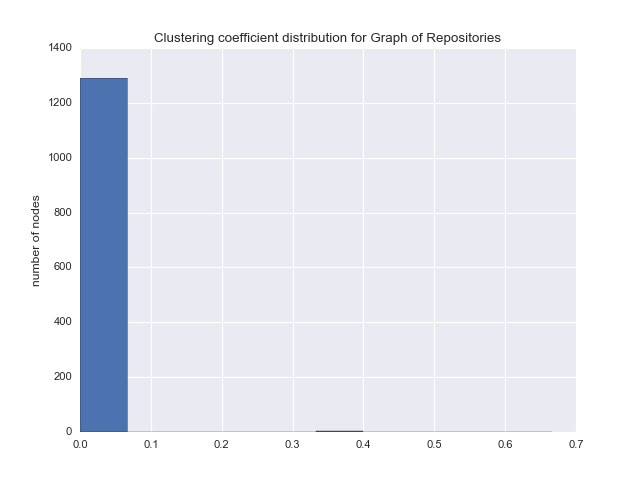

<IPython.core.display.Javascript object>


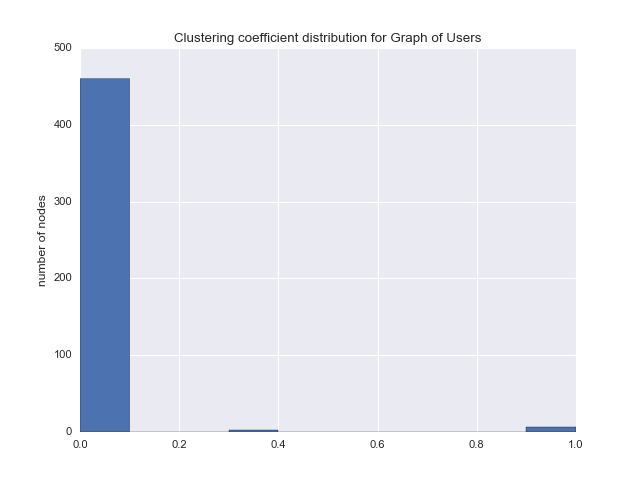

In [17]:
#Plot Clustering Coefficients of graph of repos and graph of users
print_stats_of_notconnected([G_onlyrepos, G_onlyusers])
plot_clusteringcoeff_distributions([G_onlyrepos, G_onlyusers])

In [18]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(G_onlyrepos)

False

Stats for Graph of Users and Repositories:
	Diameter: 11
	Average shortest path length: 4.583181043828403
	Average clustering coefficient: 0.008583985134132733


<IPython.core.display.Javascript object>


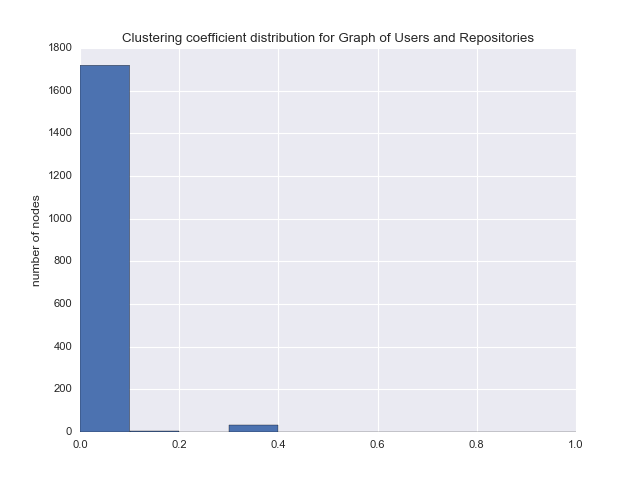

In [19]:
# For the bipartite graph G (two-mode network) which contains users and repos nodes
print_stats_of_connected([G])
plot_clusteringcoeff_distributions([G])

In [20]:
#Write graphs to gml files
nx.write_gml(G, 'repos_and_users.gml')
nx.write_gml(G_onlyrepos, 'repos.gml')
nx.write_gml(G_onlyusers, 'users.gml')

<IPython.core.display.Javascript object>


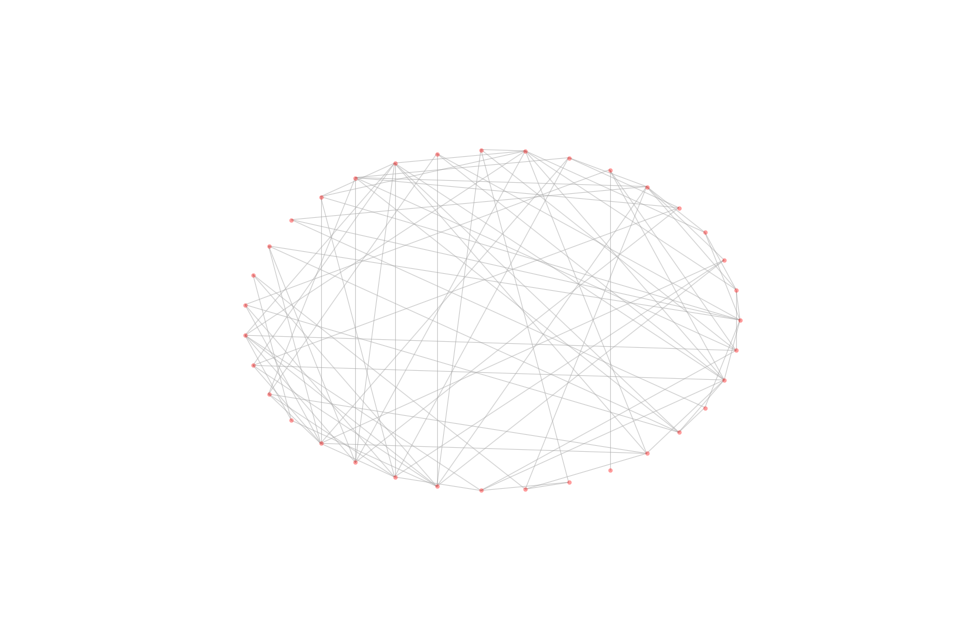

In [21]:
er2=nx.erdos_renyi_graph(35,0.15)
with sns.axes_style('white'):
    fig = plt.subplots(1, figsize=(12,8))
    nx.draw_networkx(er2, node_size=15, edge_color='#a4a4a4', pos=nx.circular_layout(er2), with_labels=False, alpha=.4, linewidths=0)
    plt.axis('off')

<IPython.core.display.Javascript object>


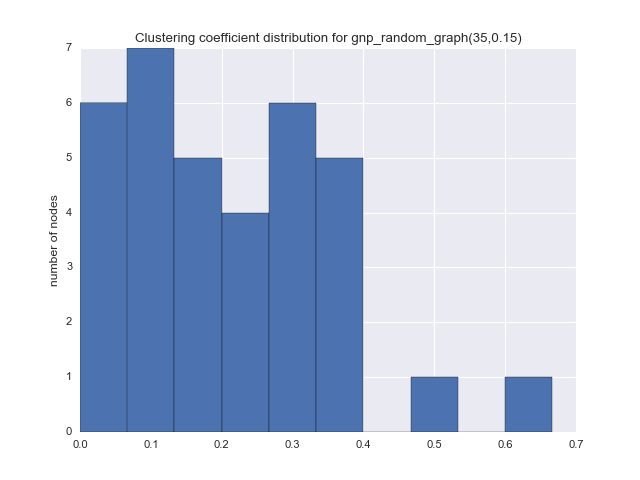

In [22]:
plot_clusteringcoeff_distributions([er2])

In [36]:
B = nx.Graph()
B.add_nodes_from(unique_emailandrepo_df['committer_email'].head(5000),bipartite=0)
B.add_nodes_from(unique_emailandrepo_df['repo_name'].head(5000),bipartite=1)
B.add_edges_from(unique_emailandrepo_df[['committer_email','repo_name']].head(5000).values)
nx.bipartite.is_bipartite(B)

True

In [37]:
nx.write_gml(B, 'bipartite_graph.gml')
# len(unique_emailandrepo_df['committer_email'].head(2000))

In [40]:
one_mode_users = bipartite.projected_graph(B, unique_emailandrepo_df['committer_email'].head(5000))
# B.nodes(data=True)

In [43]:
nx.write_gml(one_mode_users, 'one_mode_users.gml')